# ** Iris Species Data Analysis

# Attribute Information

##### The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

#It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

#The columns in this dataset are

Id
SepalLengthCm
SepalWidthCm
PetalLengthCm
PetalWidthCm
Species

In [22]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# 1- Reading the dataset

In [23]:
iris_ds = pd.read_csv('Iris_ds.csv')
iris_ds

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# 2- drop unwanted columns

In [24]:
iris_ds.drop("Id", axis=1, inplace=True)
iris_ds

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# 3- describe dataset

In [25]:
iris_ds.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# 4- dataset information

In [26]:
iris_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# 5- show  dataset distribution 

In [27]:
#show label distribution
iris_ds['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [28]:
def Species_int (x):
    if x =='Iris-setosa':
        return 1
    elif x=='Iris-virginica':
        return 2
    elif x=='Iris-versicolor':
        return 3
       
iris_ds['Species']=iris_ds['Species'].apply(lambda x:Species_int(x))
iris_ds['Species'].value_counts()

3    50
2    50
1    50
Name: Species, dtype: int64

In [47]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Pie(labels=list(iris_ds['Species'].value_counts().index),
           values=list(iris_ds['Species'].value_counts().values))])
fig.update_layout(title_text='Species Distribution')
fig.show()

In [49]:
# saparate label column
x=iris_ds.loc[:,iris_ds.columns!='Species']
y=iris_ds['Species']
x,y

(     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
 0              5.1           3.5            1.4           0.2
 1              4.9           3.0            1.4           0.2
 2              4.7           3.2            1.3           0.2
 3              4.6           3.1            1.5           0.2
 4              5.0           3.6            1.4           0.2
 ..             ...           ...            ...           ...
 145            6.7           3.0            5.2           2.3
 146            6.3           2.5            5.0           1.9
 147            6.5           3.0            5.2           2.0
 148            6.2           3.4            5.4           2.3
 149            5.9           3.0            5.1           1.8
 
 [150 rows x 4 columns],
 0      1
 1      1
 2      1
 3      1
 4      1
       ..
 145    2
 146    2
 147    2
 148    2
 149    2
 Name: Species, Length: 150, dtype: int64)

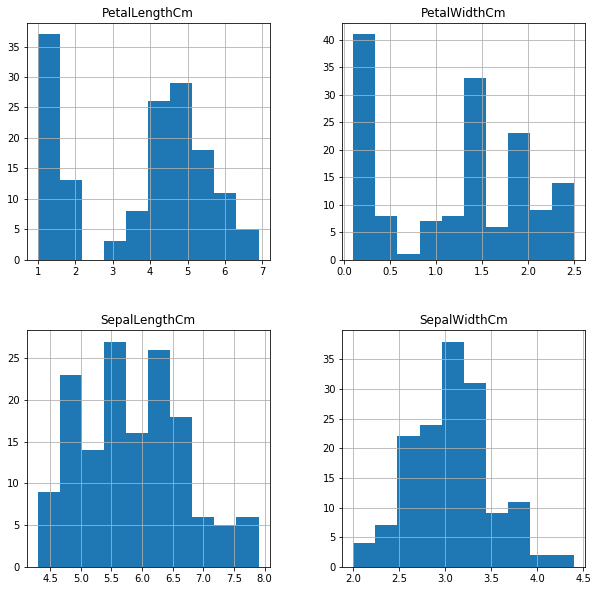

In [32]:
#features histogram 
x.hist(bins=10, figsize=(10,10))
plt.show()

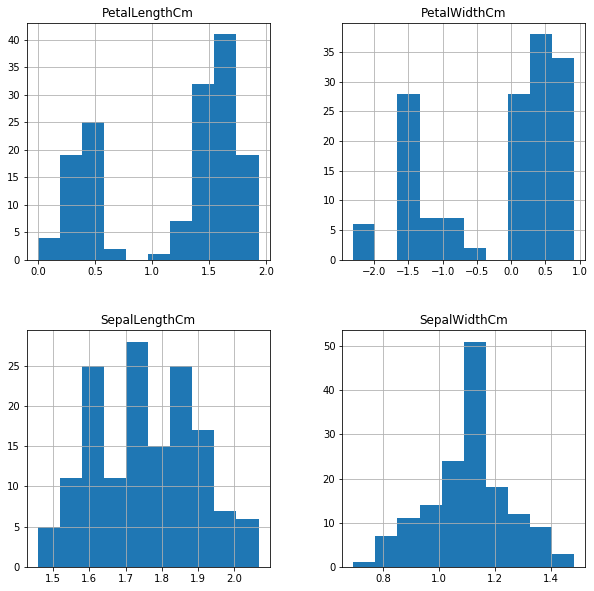

In [33]:
#histogram of log features
log_x=np.log(x)
log_x.hist(bins=10, figsize=(10,10))
plt.show()

In [50]:
#scale feature columns
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
log_x=scaler.fit_transform(log_x)

# 7 -Run the CVM model

In [51]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [52]:
xtrain,xtest,ytrain,ytest=train_test_split(log_x,y,test_size=0.2)

In [70]:
svm=SVC(kernel='rbf', random_state=0, gamma=0.2,C=1)
svm.fit (xtrain,ytrain)

SVC(C=1, gamma=0.2, random_state=0)

In [71]:
from sklearn.metrics import accuracy_score
predictionstest =svm.predict(xtest)
print('Model accurcy in testing = {}'.format(accuracy_score(ytest,predictionstest)))
predictionstrain =svm.predict(xtrain)
print('Model accurcy in testing = {}'.format(accuracy_score(ytrain,predictionstrain)))

Model accurcy in testing = 0.8
Model accurcy in testing = 0.875


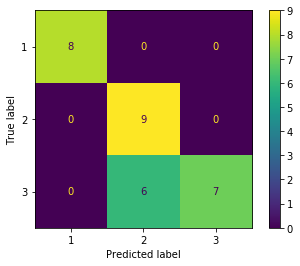

In [63]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svm,xtest,ytest)
plt.show()

In [67]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(log_x,y,clf=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.title(' SVM RBF Gamma=0.1')
plt.show()

ValueError: y must be a NumPy array. Found <class 'pandas.core.series.Series'>

# 8- save the model

In [ ]:
import pickle
pkl_filename = "iris_model.pkl"
with open(pkl_filename, 'wb') as file: 
    pickle.dump(svm, file)

# 9-Reuse the model

In [ ]:
with open(pkl_filename, 'rb') as file: 
    iris_model = pickle.load(file)

In [ ]:
preds=iris_model.predict(xtest)
print('Model accurcy in testing = {}'.format(accuracy_score(ytest,predictionstest)))
predictionstrain =svm.predict(xtrain)
print('Model accurcy in testing = {}'.format(accuracy_score(ytrain,predictionstrain)))